In [25]:
from types import GeneratorType
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [2]:
denver = pd.read_csv(
    'https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_denver/dwellings_denver.csv')


In [3]:

ml_dat = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")

ml_dat.columns

Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

In [18]:
sub_dat = denver.sample(500)

alt.Chart(sub_dat).mark_boxplot().encode(
    y = alt.Y("yrbuilt", scale=alt.Scale(zero=False)),
    x = "gartype"
)

alt.Chart(...)

NotImplementedError: positional of type <class 'matplotlib.axes._subplots.AxesSubplot'>

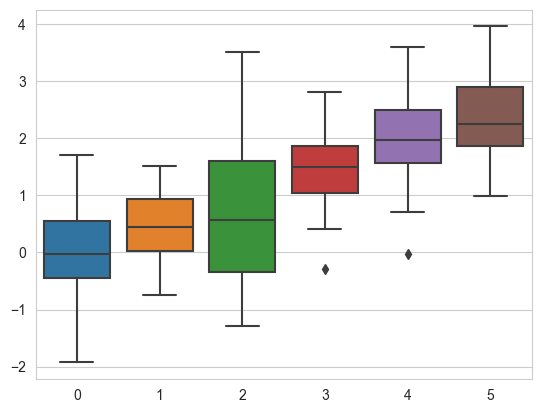

In [33]:
sns.set_style("whitegrid")
data = alt.Chart(sub_dat).encode(sns.boxplot(data=data))


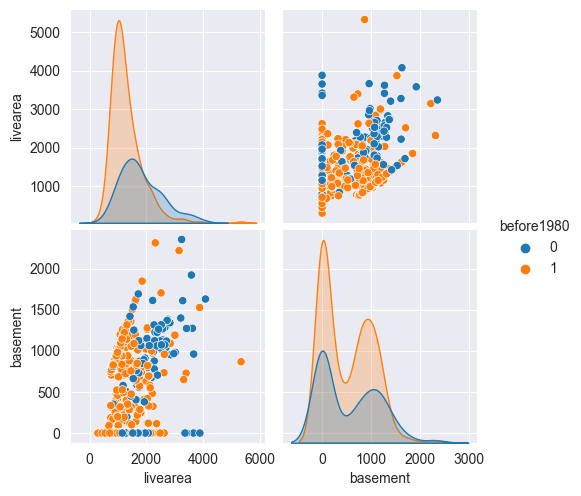

In [16]:
sub_dat1 = ml_dat.filter(["livearea", "finsbsmt", "basement",
 "yearbuilt", "before1980"]).sample(500)


sns.set_style("darkgrid") #try "whitegrid", "white", "dark"
sns.pairplot(sub_dat1, hue = "before1980")

<AxesSubplot:>

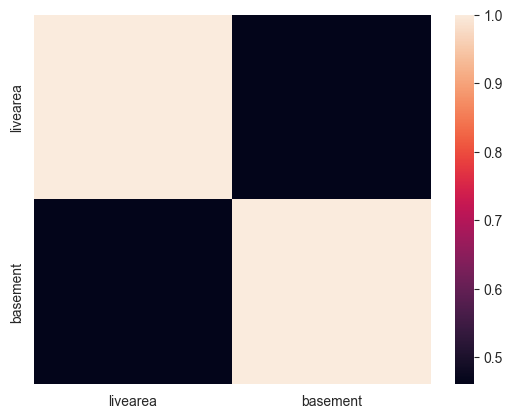

In [6]:
corr = sub_dat1.drop(columns = "before1980").corr()

sns.heatmap(corr)

In [7]:
x = ml_dat.filter(["livearea", "finsbsmt", "basement", "before1980"]).sample(500)
y = ml_dat.before1980.sample(500)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 222)

x_test.head()

,livearea,basement,before1980
10150,1451,0,0
14177,1080,347,1
4488,1039,0,1
11116,1634,0,1
16527,1285,1096,1


In [8]:
y_train.head()

3939     1
8174     1
14083    1
1240     0
7256     1
Name: before1980, dtype: int64

In [9]:
#Create the model
classifier = DecisionTreeClassifier()

#Train the model / fit the model
classifier.fit(x_train, y_train)

#make predictions
y_predictions = classifier.predict(x_test)

#test how accurate predictions are
metrics.accuracy_score(y_test, y_predictions)

0.552